# 가설1 고민하지말고 프렌차이즈??

그냥 고민하지 말고 프렌차이즈 치킨을 시키는 것이 좋을까??
- bbq 맘스터치 굽네치킨 교촌치킨 bhc
# 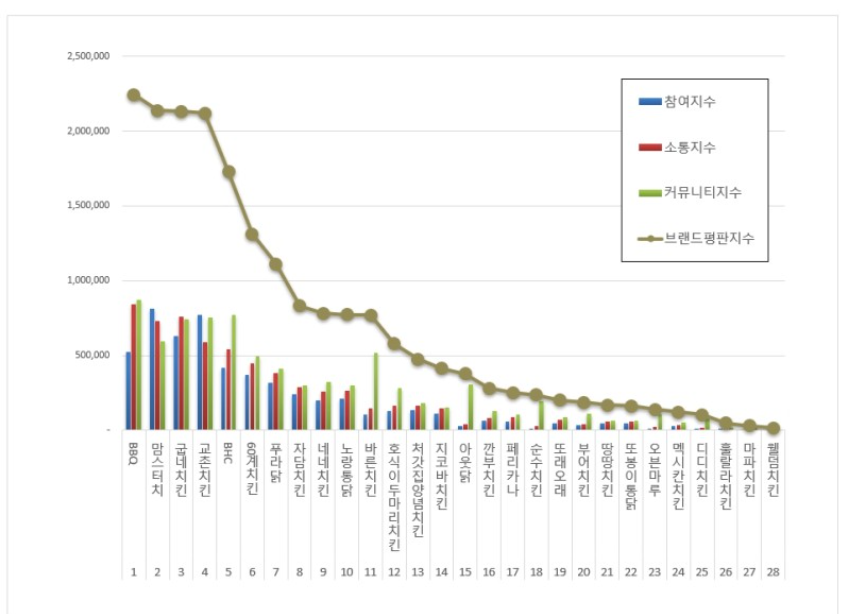

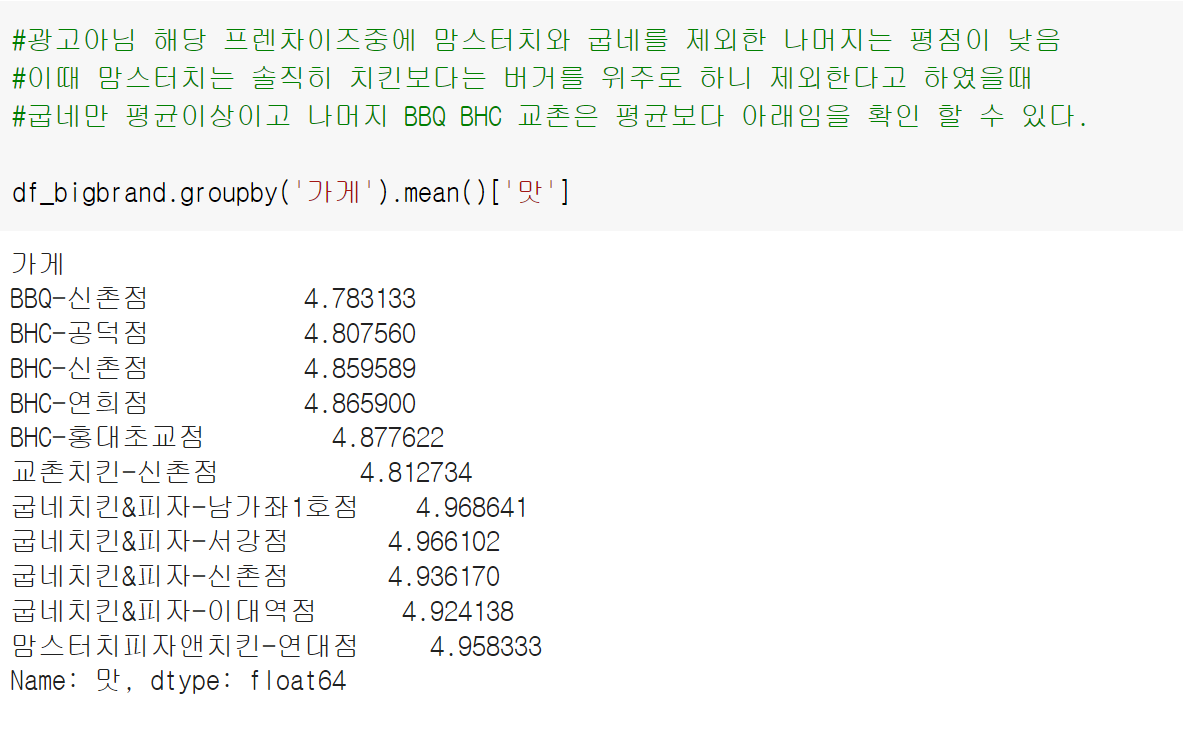

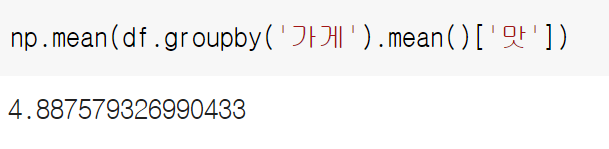

따라서 제일 유명한 프렌차이즈라고 꼭 시킬 필요는 없고, 소규모의 프랜차이즈나 동네의 치킨집을 시켜도 된다고 생각한다!!

# 가설2 불금에 치킨일까??

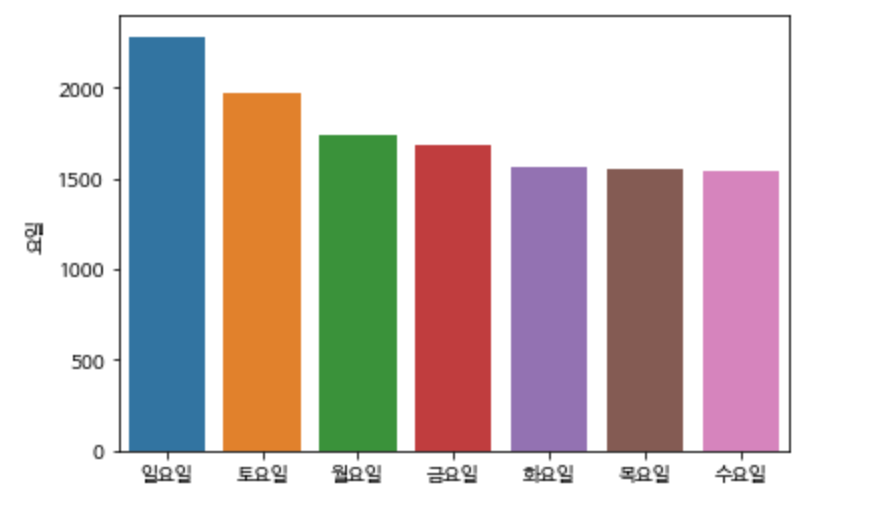

결론
- 불금에 치킨보다는 휴일에 치킨이 더 주문이 많음
- 토요일이 더 많을 것이라고 예상했는데 일요일이 더많다!!
- 월요일에 치킨주문량이 더 많다. (월요병 치료??)

# 통계적 추천시스템

In [ ]:
#평점이 높은 상위 k개의 치킨집을 불러옴
def mean_rem(df,k,reverse):
  df_group_shop = df.groupby('가게').mean()
  df_group_shop.sort_values(by = '맛',ascending = reverse,inplace = True)
  
  return df_group_shop.head(k)

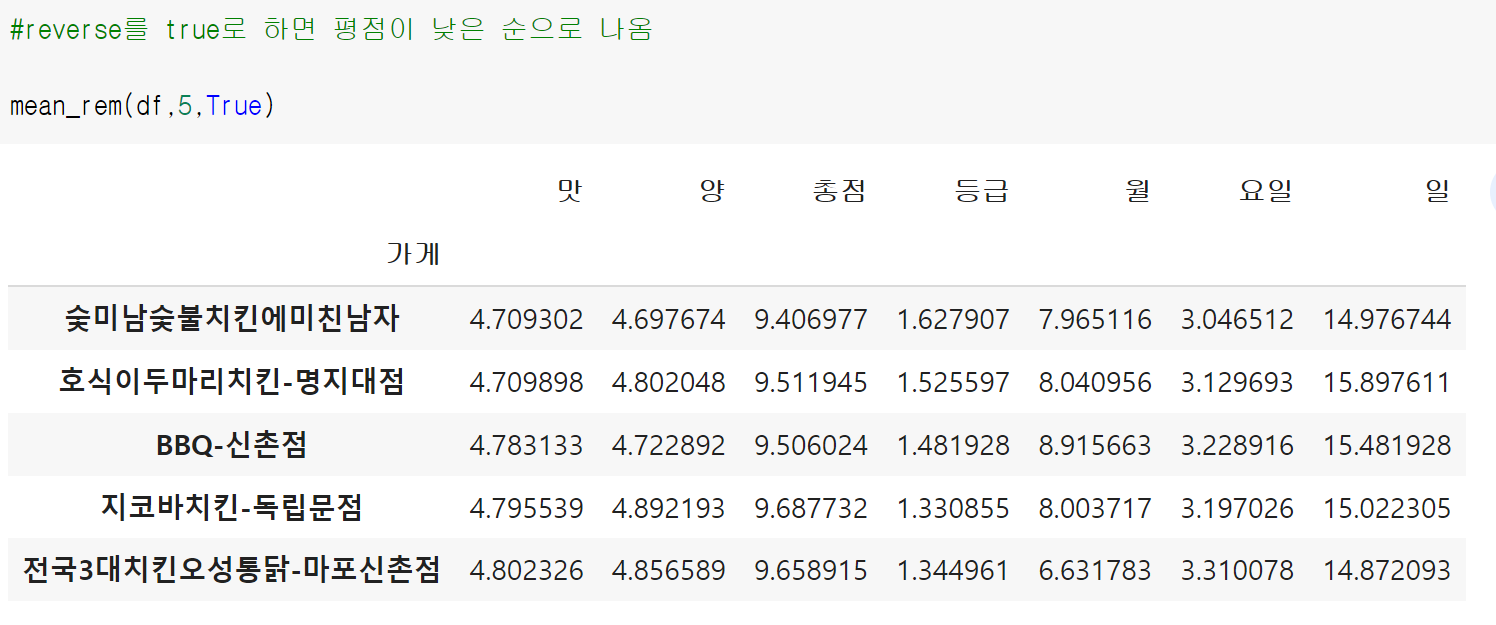

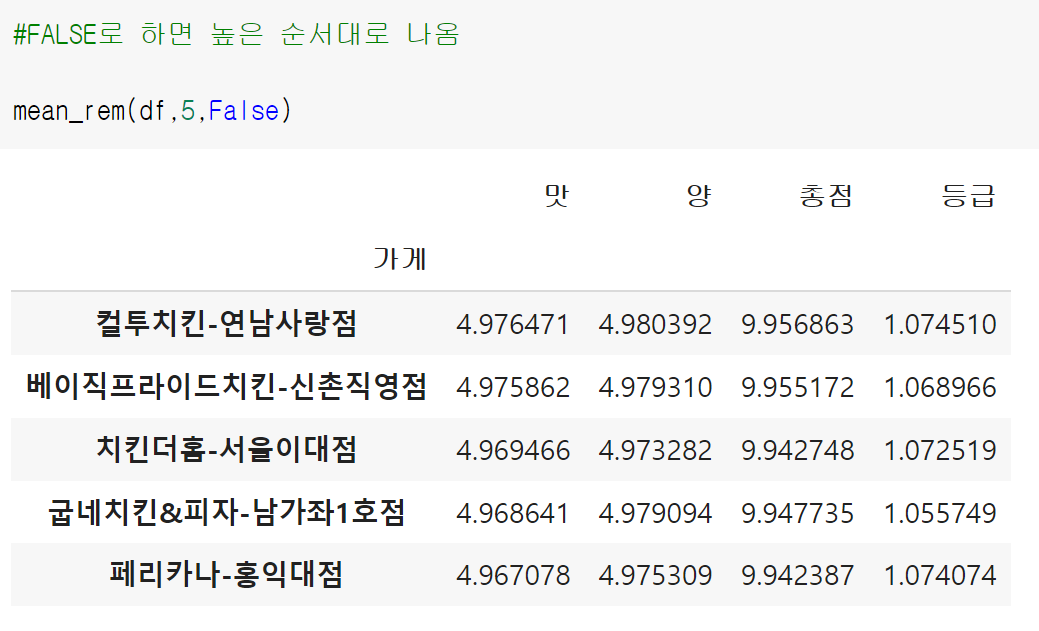

# mf를 이용한 추천시스템

In [ ]:
#R은 기존 평점 행렬
#K는 P,Q를 초기화하기 위한 상수


def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    break_count = 0
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    # NON-ZERO: 사용자가 먹은 치킨들만 따로 행렬을 만들음
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
   
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q,rmse

In [ ]:
# 더 좋은 결과값을 얻기 위한 하이퍼파라미터 튜닝하기

from sklearn.model_selection import ParameterGrid

min = 50000 


grid = ParameterGrid({
    'K':[30,40,50,60],
    "learning_rate": [0.01,0.001,0.1,0.02,0.025],
    'r_lambda':[0.01,0.02,0.03,0.001]
})

err = []

for params in grid:
    
    try:
      P, Q,rmse = matrix_factorization(ratings_matrix.values, K=params['K'], steps=200, learning_rate=params['learning_rate'], r_lambda = params['r_lambda'])
      
      if rmse < min:
        min = rmse
        best_parm = params

    except:
      err.append(params)
print(min)
print(best_parm)

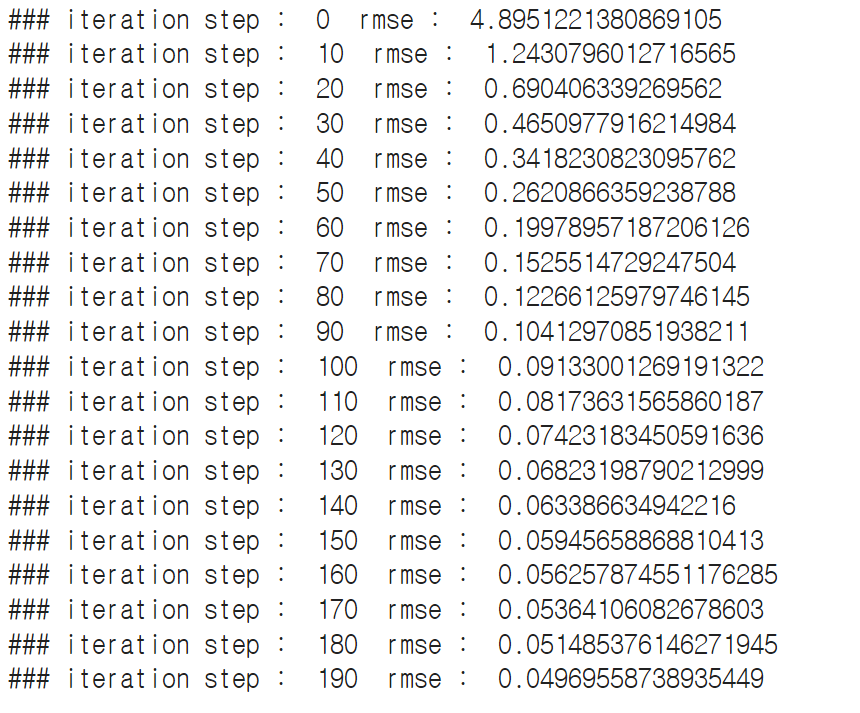

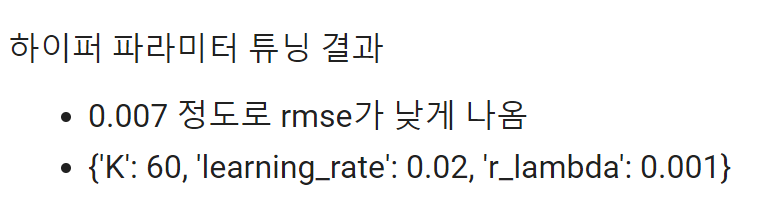

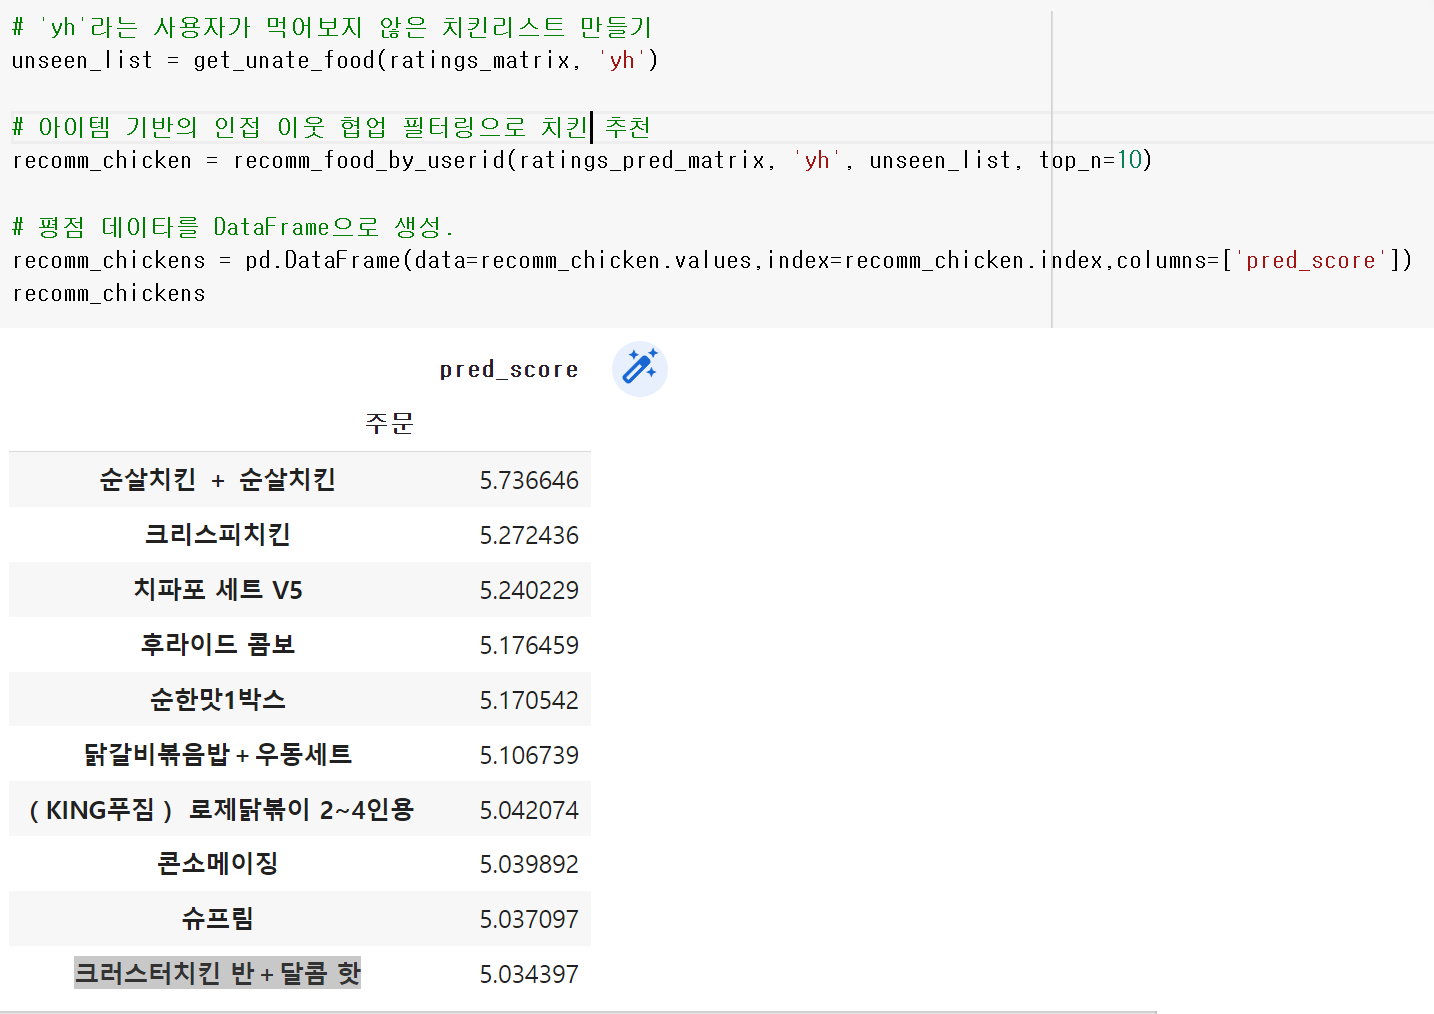

# 키워드 추출하기 - krwordrank

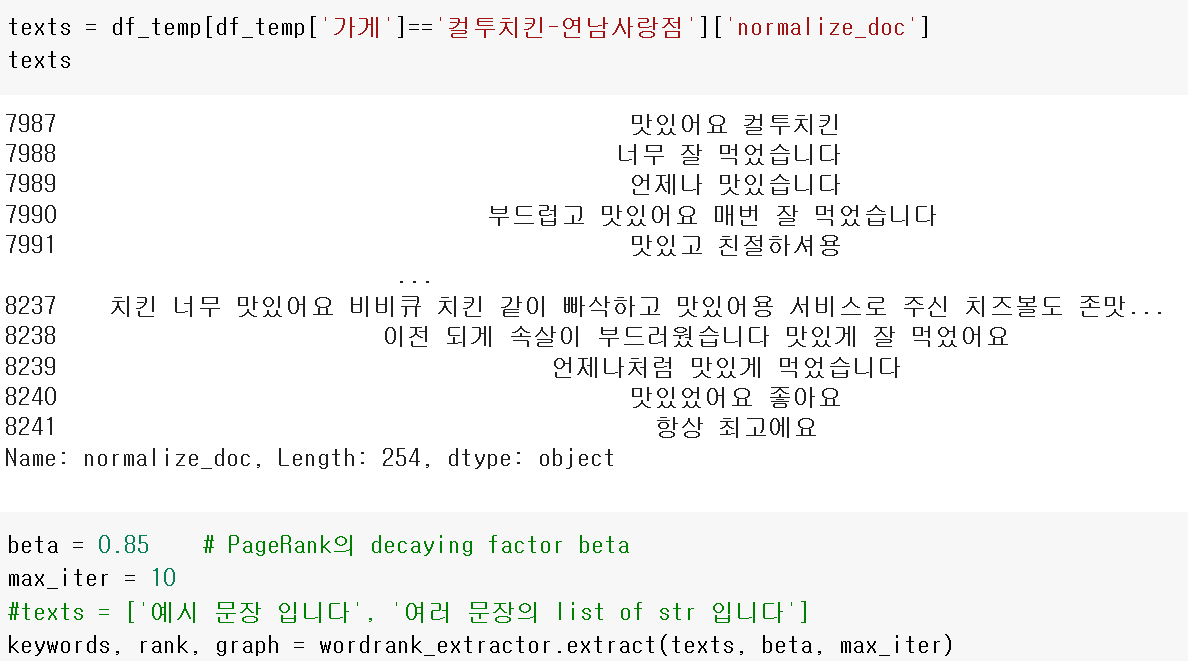

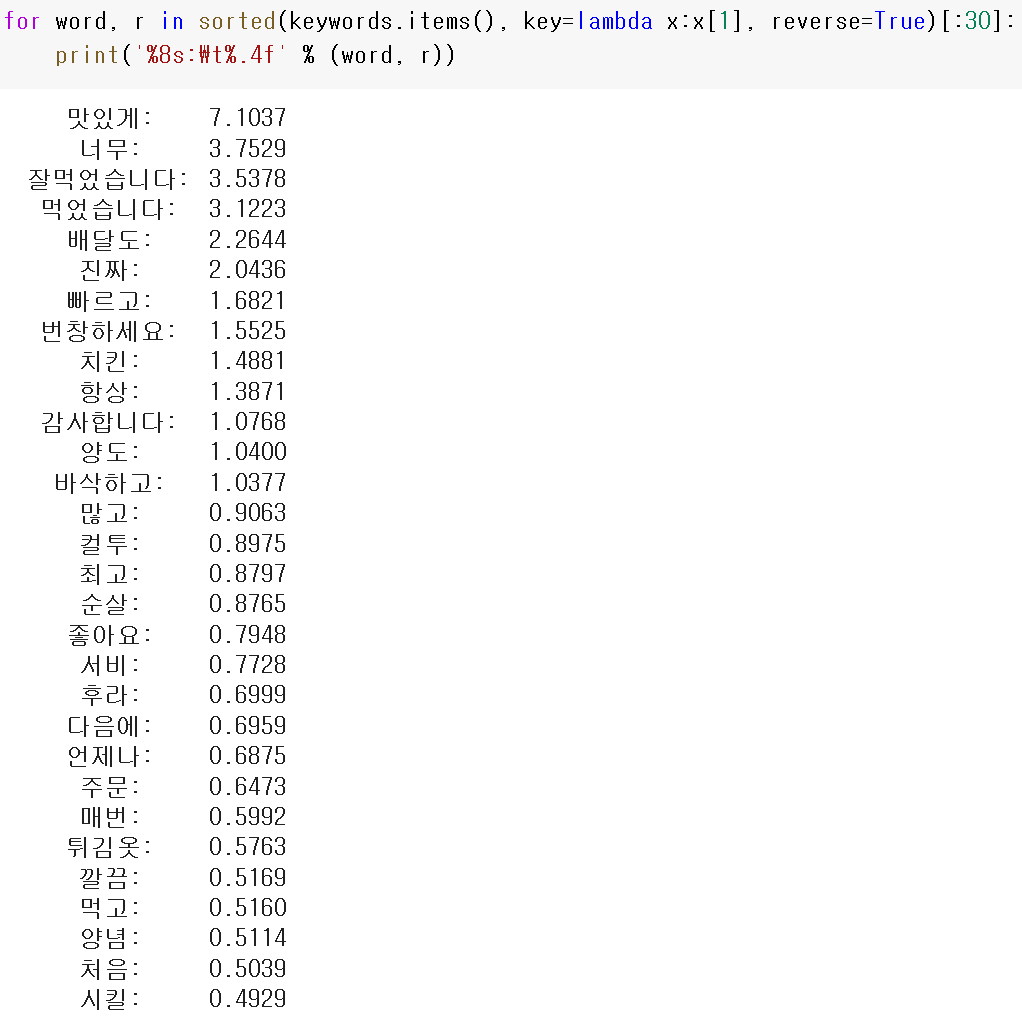

평점이 낮은 치킨집의 키워드 살펴보기

fnames = ['BBQ-신촌점',
          '지코바치킨-독립문점',
          '숯미남숯불치킨에미친남자']

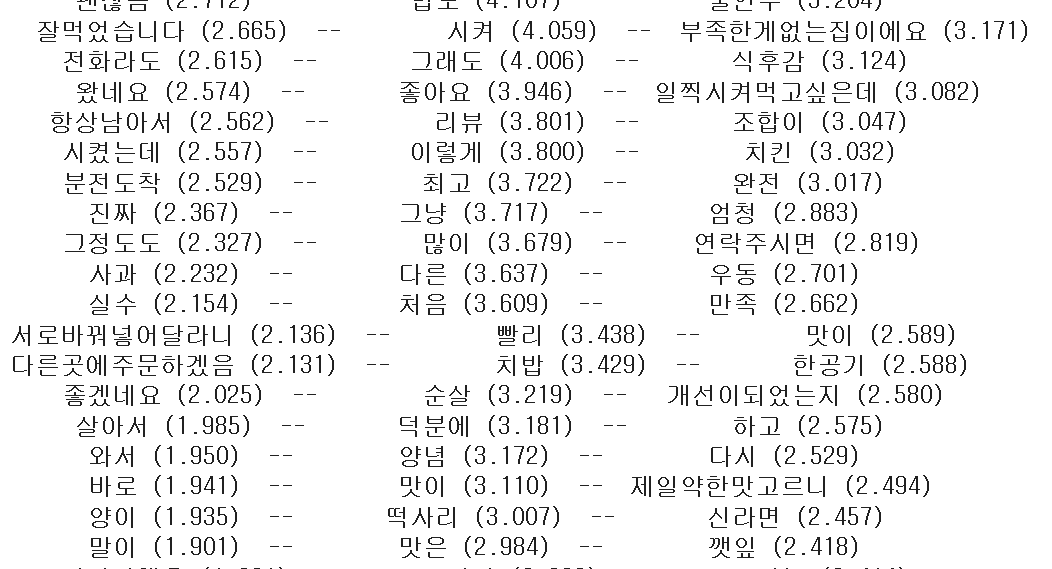

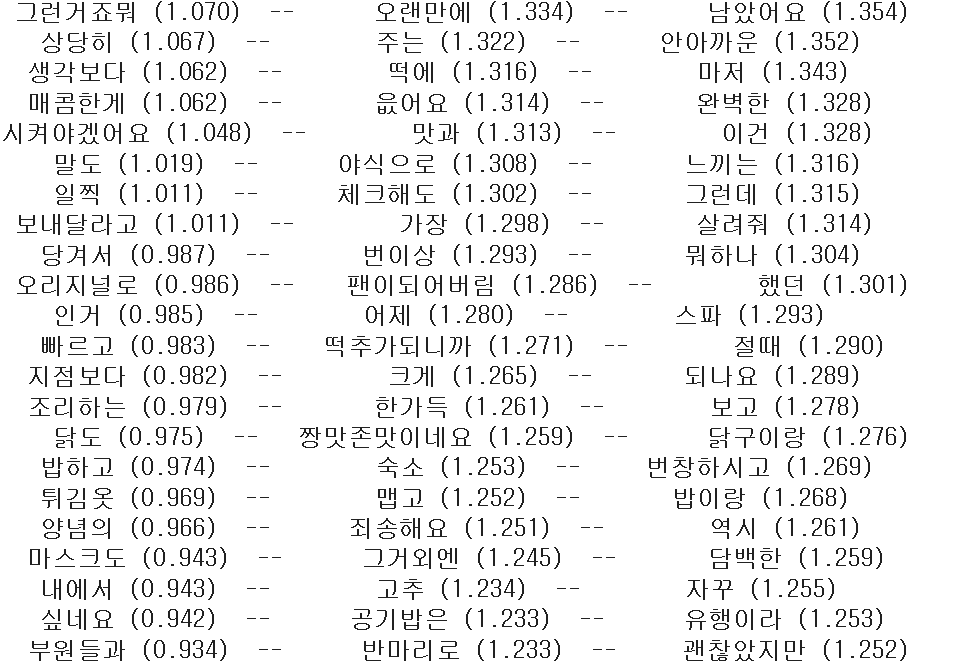

위에는 평점이 높은 컬투치킨의 워드클라우드이고 아래는 평점이 낮은 숯미남숯불치킨에미친남자

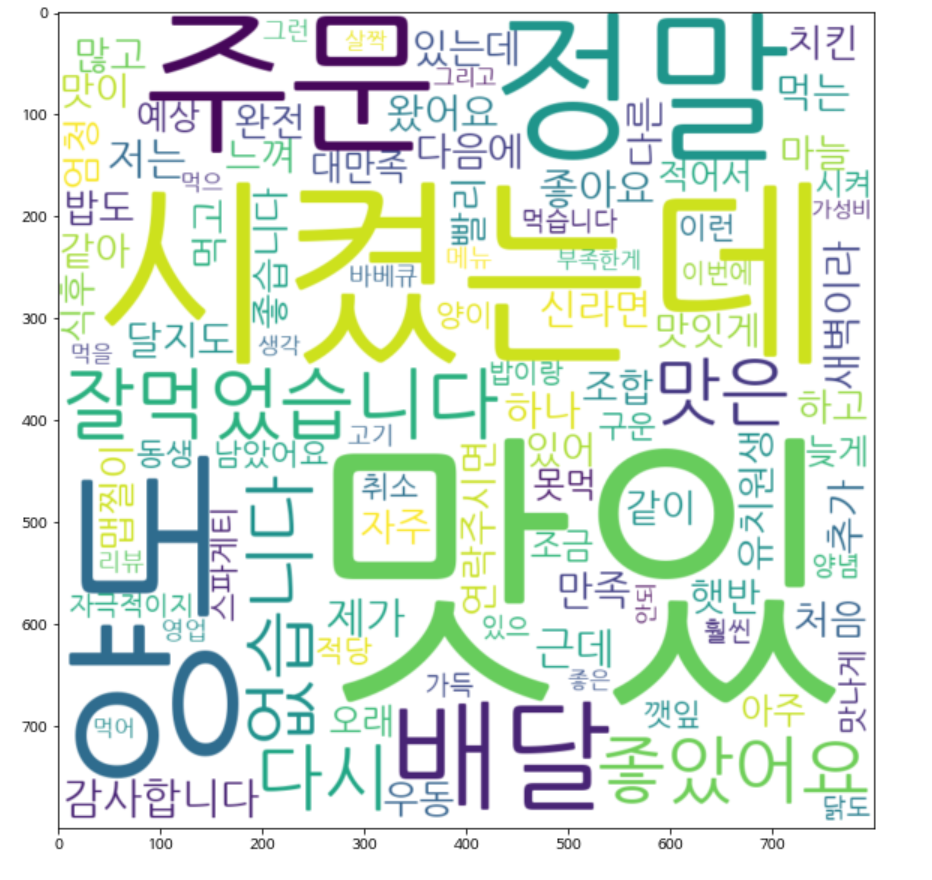

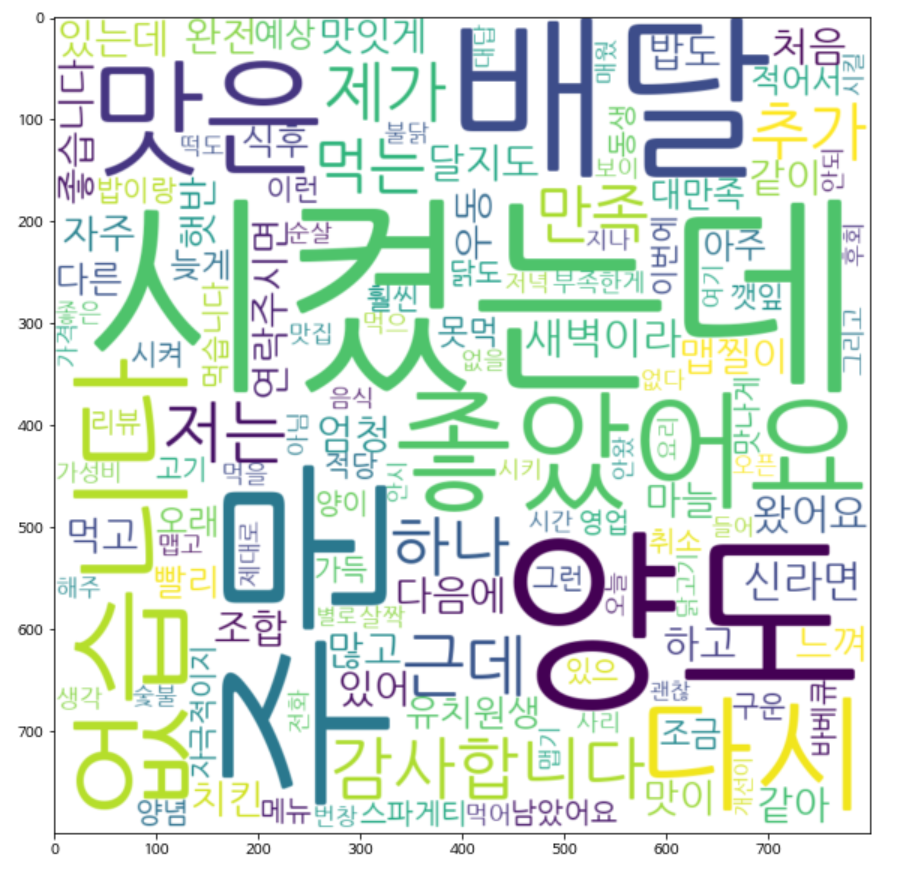

# 보완할 점

- 하이퍼 파리미터 튜닝을 통해서 성능을 올렸지만 과적합의 위험이 있기 때문에 앙상블이나 여러 기법등의 사용이 필요해 보임
- 데이터의 경우 정보가 적어서 다음에는 좀 더 구체적인 정보의 크롤링의 필요성을 느낌

# 느낀점
- 약2주동안 5~6번의 프로젝트 회의를 하면서 하나의 간단한 프로젝트라도 엄청난 시간과 소통이 필요하다는 것을 깨달음
- 데이터를 직접 수집하는 것은 시간이 매우 많이 필요하다.
- try ~ except가 사기다. 이거없으면 큰일날뻔했다
